
# Classification of men and women

#### OkCupid Profile Data for Intro Stats and Data Science Courses

Data analysis of profiles dataset as a school project for VOS2 subject.

**Author:** Peter Mačinec

## Attributes
Taken from: [https://github.com/rudeboybert/JSE_OkCupid](https://github.com/rudeboybert/JSE_OkCupid)

* **body_type** - rather not say, thin, overweight, skinny, average, fit, athletic, jacked, a little extra, curvy, full figured, used up
* **diet** - mostly/strictly; anything, vegetarian, vegan, kosher, halal, other
* **drinks** - very often, often, socially, rarely, desperately, not at all
* **drugs** - never, sometimes, often
* **education** - graduated from, working on, dropped out of; high school, two-year college, university, masters program, law school, med school, Ph.D program, space camp
* **ethnicity** - Asian, middle eastern, black, native American, indian, pacific islander, Hispanic/latin, white, other
* **height** - inches
* **income** - (US dollar, -1 means rather not say) -1, 20000, 30000, 40000, 50000, 60000 70000, 80000, 100000, 150000, 250000, 500000, 1000000,
* **job** - student, art/music/writing, banking/finance, administration, technology, construction, education, entertainment/media, management, hospitality, law, medicine, military, politics/government, sales/marketing, science/engineering, transportation, unemployed, other, rather not say, retire
* **offspring** - has a kid, has kids, doesnt have a kid, doesn't want kids; ,and/,but might want them, wants them, doesnt want any, doesnt want more
* **orientation** - straight, gay, bisexual
* **pets** - has dogs, likes dogs, dislikes dogs; and has cats, likes cats, dislikes cats
* **religion** - agnosticism, atheism, Christianity, Judaism, Catholicism, Islam, Hinduism, Buddhism, Other; and very serious about it, and somewhat serious about it, but not too serious about it, and laughing about it
* **sex** - m, f
* **sign** - aquarius, pices, aries, Taurus, Gemini, cancer, leo, virgo, libra, scorpio, saggitarius, Capricorn; but it doesn’t matter, and it matters a lot, and it’s fun to think about
* **smokes** - yes, sometimes, when drinking, trying to quit, no
* **speaks** - English (fluently, okay, poorly). Afrikaans, Albanian, Arabic, Armenian, Basque, Belarusan, Bengali, Breton, Bulgarian, Catalan, Cebuano, Chechen, Chinese, C++, Croatian, Czech, Danish, Dutch, Esperanto, Estonian, Farsi, Finnish, French, Frisian, Georgian, German, Greek, Gujarati, Ancient Greek, Hawaiian, Hebrew, Hindi, Hungarian, Icelandic, Ilongo, Indonesian, Irish, Italian, Japanese, Khmer, Korean, Latin, Latvian, LISP, Lithuanian, Malay, Maori, Mongolian, Norwegian, Occitan, Other, Persian, Polish, Portuguese, Romanian, Rotuman, Russian, Sanskrit, Sardinian, Serbian, Sign Language, Slovak, Slovenian, Spanish, Swahili, Swedish, Tagalog, Tamil, Thai, Tibetan, Turkish, Ukranian, Urdu, Vietnamese, Welsh, Yiddish (fluently, okay, poorly)
* **status** - single, seeing someone, married, in an open relationship
* **essay0** - My self summary
* **essay1** - What I’m doing with my life
* **essay2** - I’m really good at
* **essay3** - The first thing people usually notice about me
* **essay4** - Favorite books, movies, show, music, and food
* **essay5** - The six things I could never do without
* **essay6** - I spend a lot of time thinking about
* **essay7** - On a typical Friday night I am
* **essay8** - The most private thing I am willing to admit
* **essay9** - You should message me if...

**SPECIAL NOTES:** All essay questions are fill-in the blank, answers are not summarized here.

## Setup and import libraries

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection as ms

# Hiding warnings of assigning values to dataframe
pd.options.mode.chained_assignment = None  # default='warn'

## Read the data

In [2]:
df = pd.read_csv('data/profiles.csv')

Look at data:

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


## Basic analysis

Count of records:

In [4]:
len(df)

59946

Columns of each record:

In [5]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

Datatypes of columns:

In [6]:
df.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

### Split data into train and test subsets

In [7]:
# all data without 'sex' column, which will be predicted 
X = df[df.columns.difference(['sex'])]

# only 'sex' column from data
y = df.sex

# split data into train and test subsets
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
len(X_train), len(X_test)

(47956, 11990)

### Another setup for efficient analysis

In [9]:
# add sex variable to X_train for efficient analysis
X_train['sex'] = y_train

# create also 2 dataframes of only men and women
m = X_train[X_train.sex == 'm']
f = X_train[X_train.sex == 'f']

Are there any null values in the data?

In [10]:
X_train.isnull().values.any()

True

NULL values per row can be interesting:

In [11]:
X_train.isnull().sum()

age                0
body_type       4197
diet           19483
drinks          2350
drugs          11164
education       5286
essay0          4375
essay1          6051
essay2          7711
essay3          9183
essay4          8441
essay5          8728
essay6         11007
essay7          9977
essay8         15338
essay9         10094
ethnicity       4552
height             2
income             0
job             6507
last_online        0
location           0
offspring      28442
orientation        0
pets           15906
religion       16139
sign            8831
smokes          4398
speaks            44
status             0
sex                0
dtype: int64

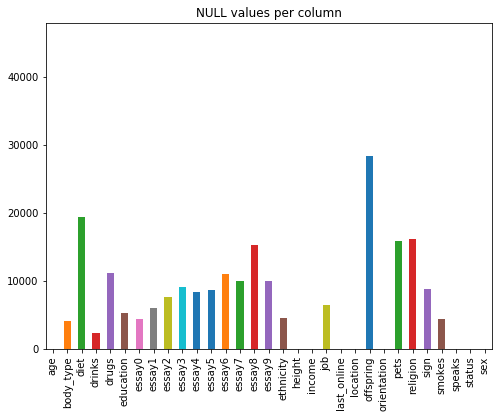

In [12]:
plt.rcParams['figure.figsize'] = (8, 6)
X_train.isnull().sum().plot(kind='bar', title='NULL values per column', ylim=(0, len(X_train)))
plt.rcParams['figure.figsize'] = (5, 4)

## Attributes analysis

### Sex
Check distribution of men and women in our dataset:

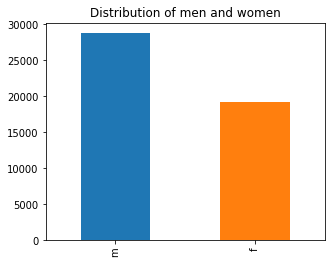

In [13]:
y_train.value_counts().plot(kind='bar', title='Distribution of men and women')

Also pie chart can be interesting:

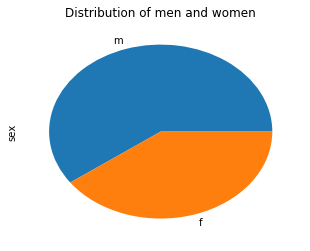

In [14]:
y_train.value_counts().plot(kind='pie', title='Distribution of men and women')

From those charts, we can see that there are more men than women in data. It is necessary to keep it in mind when analysing to gain truthful results.

### Numerical attributes
* age
* height
* income

Check typical numerical statistics:

In [15]:
X_train.describe()

,age,height,income
count,47956.000000,47954.000000,47956.000000
mean,32.312620,68.300851,19972.083514
std,9.441476,3.989875,97116.503905
min,18.000000,3.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### Age
Let's check if there are some differences between men and women:

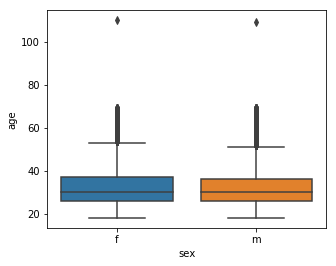

In [16]:
sns.boxplot('sex', 'age', data=X_train)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


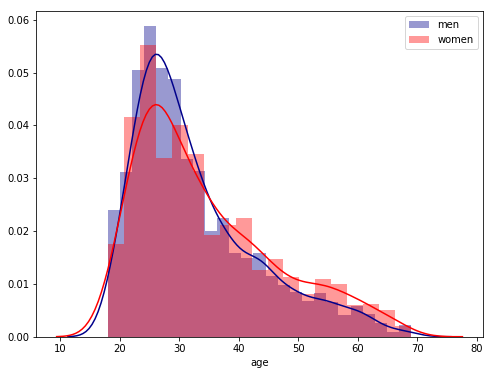

In [17]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.distplot(m.dropna().age, color='darkblue', label='men')
sns.distplot(f.dropna().age, color='red', label='women')
plt.legend()
plt.rcParams['figure.figsize'] = (5, 4)

We can see there are no significant differences between men and women on average.

#### Height

Height attribute stores values in *inches*, so in preprocessing, we need to convert them to *cm*. We will do it also now for better plot visualization:

In [18]:
X_train.height = X_train.height.apply(lambda x: x * 2.54)

Are there any differences between men and women in their height?

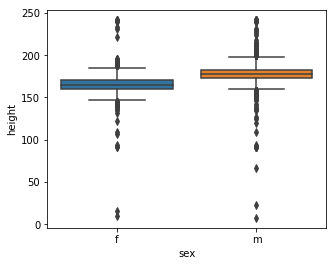

In [19]:
sns.boxplot('sex', 'height', data=X_train)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


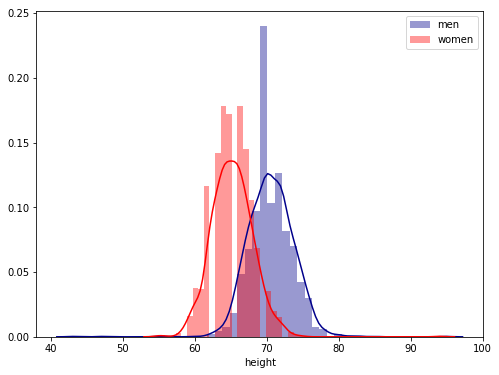

In [20]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.distplot(m.dropna().height, color='darkblue', label='men')
sns.distplot(f.dropna().height, color='red', label='women')
plt.legend()
plt.rcParams['figure.figsize'] = (5, 4)

In [21]:
# get values back
X_train.height = X_train.height.apply(lambda x: x / 2.54)

From plots above, we can see that men are taller on average. So, using height as predictor sounds like a good idea.

#### Income

It is said that men have on average a higher salary than women. Let's look at it:

From analysis above, we could see that minimum value is -1. This probably stands for the fact that person does not want to tell real value of his income. How many percent of values are there that are higher than -1?

In [22]:
len(X_train[X_train.income >= 0]) / len(X_train) * 100

19.169655517557764

Only 19 percent! So, while analysing income, we still need to know that we are working just with approximately 20 percents of our data!

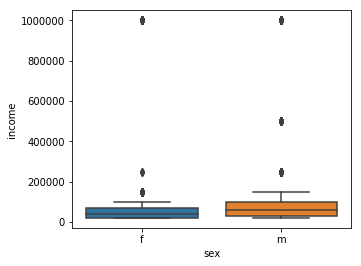

In [23]:
sns.boxplot('sex', 'income', data=X_train[X_train.income >= 0])

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


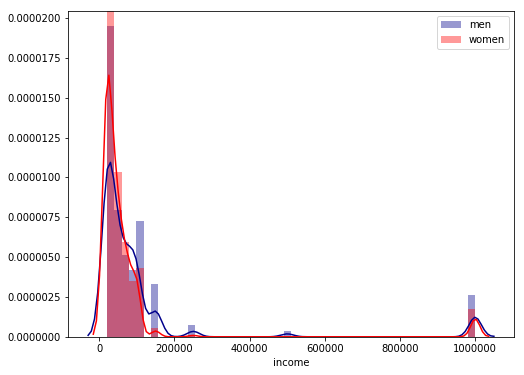

In [24]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.distplot(m[m.income >= 0].dropna().income, color='darkblue', label='men')
sns.distplot(f[f.income >= 0].dropna().income, color='red', label='women')
plt.legend()
plt.rcParams['figure.figsize'] = (5, 4)

### Categorical attributes

* body_type
* diet
* drinks
* drugs
* education
* ethnicity
* job
* location
* offspring
* orientation
* pets
* religion
* sign
* smokes
* speaks
* status

**Note:** Because there are more men in our dataset than women, all distribution plots (bar plots, ...) are showing distribution in percent.

Check typical statistics:

In [25]:
X_train.describe(exclude=np.number)

,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,...,location,offspring,orientation,pets,religion,sign,smokes,speaks,status,sex
count,43759,28473,45606,36792,42670,43581,41905,40245,38773,39515,...,47956,19514,47956,32050,31817,39125,43558,47912,47956,47956
unique,12,18,6,3,32,43507,41249,39021,34974,39400,...,174,15,3,15,45,48,5,6397,5,2
top,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,ask me,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,scorpio and it&rsquo;s fun to think about,no,english,single,m
freq,11808,13289,33512,30259,19098,9,48,64,422,12,...,24873,6011,41358,11823,2195,1425,35071,17437,44585,28755


In [26]:
# helpful functions
def grouped_barplot(attribute, title=None, size=(5, 4), rotation=0):
    """Draw barplot grouped by 'sex' attribute."""
    plt.rcParams['figure.figsize'] = size
    data = X_train.groupby('sex')[attribute].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    sns.barplot(attribute, 'percentage', hue='sex', data=data)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.rcParams['figure.figsize'] = (5, 4)

#### Body type

At first, check unique values:

In [27]:
X_train.body_type.unique()

array(['average', 'fit', 'athletic', 'a little extra', 'thin', nan,
       'curvy', 'skinny', 'rather not say', 'jacked', 'overweight',
       'full figured', 'used up'], dtype=object)

There are several groups of body types. Check distribution of each type, grouped by sex attribute to check differences between men and women:

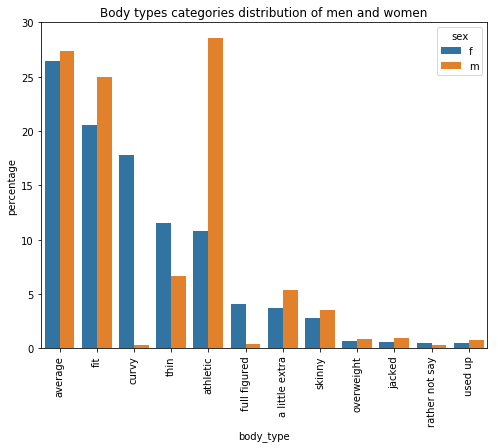

In [28]:
grouped_barplot('body_type', 'Body types categories distribution of men and women', (8, 6), 90)

There are 2 very significant values that tell us the difference - there are **much more women with *curvy* or *full figured* body type**, and the second one, there are **much more men with *athletic* body type**.

#### Diet

With body type, also diet is connected somehow. Let's check, if also there are some differences:

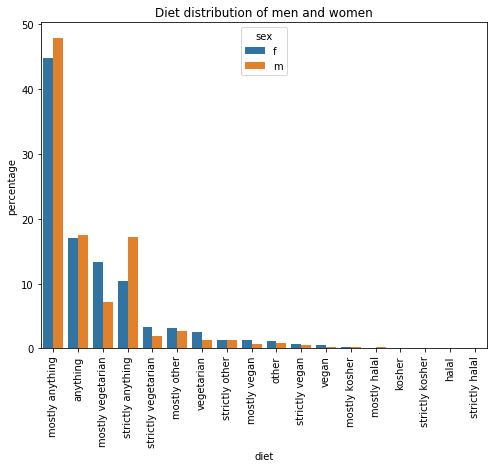

In [29]:
grouped_barplot('diet', 'Diet distribution of men and women', (8, 6), 90)

There is no significant variety between men and women when looking at diet. Probably it is not going to be something that is able to help classifying men and women.

#### Drinks, Drugs, Smokes

Are there big differences between men and women at drinking alcohol, taking drugs or smoking? Not at all, or just a little:

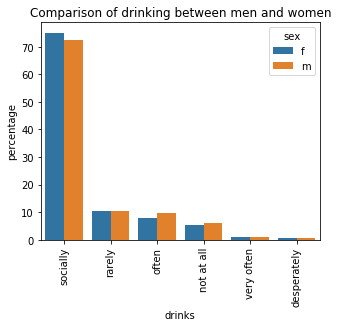

In [30]:
grouped_barplot('drinks', 'Comparison of drinking between men and women', rotation=90)

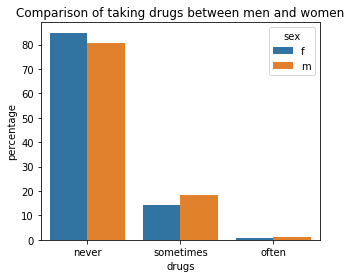

In [31]:
grouped_barplot('drugs', 'Comparison of taking drugs between men and women')

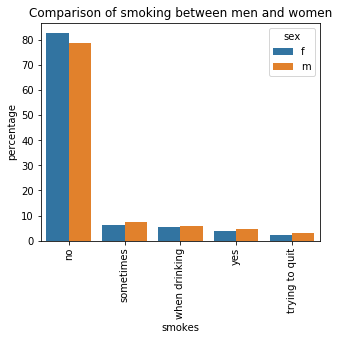

In [32]:
grouped_barplot('smokes', 'Comparison of smoking between men and women', rotation=90)

#### Jobs

Men are probably working at different positions in job as women, so maybe there would be some hidden features: 

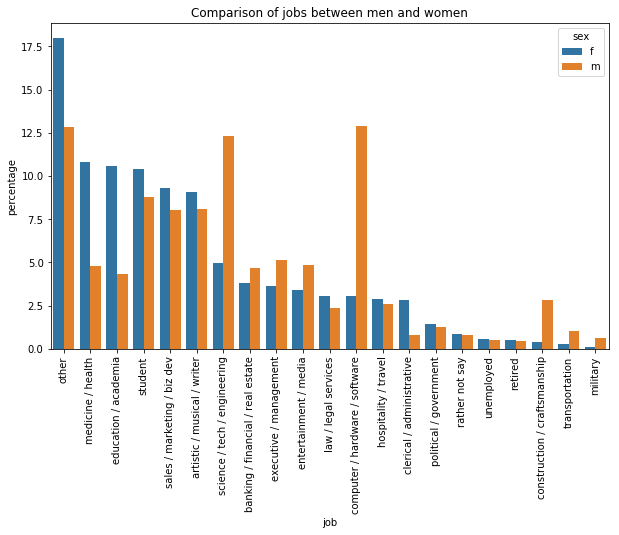

In [33]:
grouped_barplot('job', 'Comparison of jobs between men and women', (10, 6), 90)

There are a lot of information about men and women and their differences at jobs. There are **more men working at IT, engineering, etc**. On the other hand, **more women are working at medicine or education**.

#### Orientation, Status

Orientation and statuses are not showing something interesting:

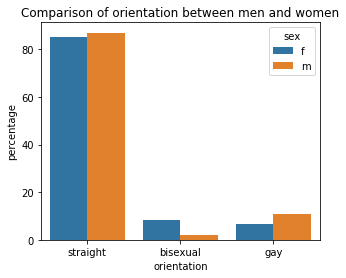

In [34]:
grouped_barplot('orientation', 'Comparison of orientation between men and women')

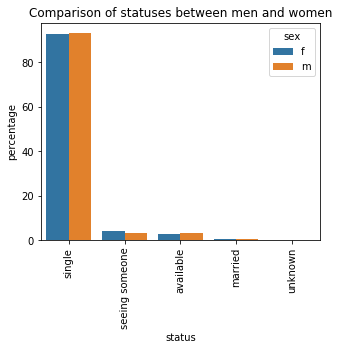

In [35]:
grouped_barplot('status', 'Comparison of statuses between men and women', rotation=90)

#### Sign

One of very curious attribute is sign of each person:

In [36]:
# just repairing data
X_train['sign'] = X_train['sign'].apply(lambda x: None if not isinstance(x, str) else x.replace('&rsquo;', ""))

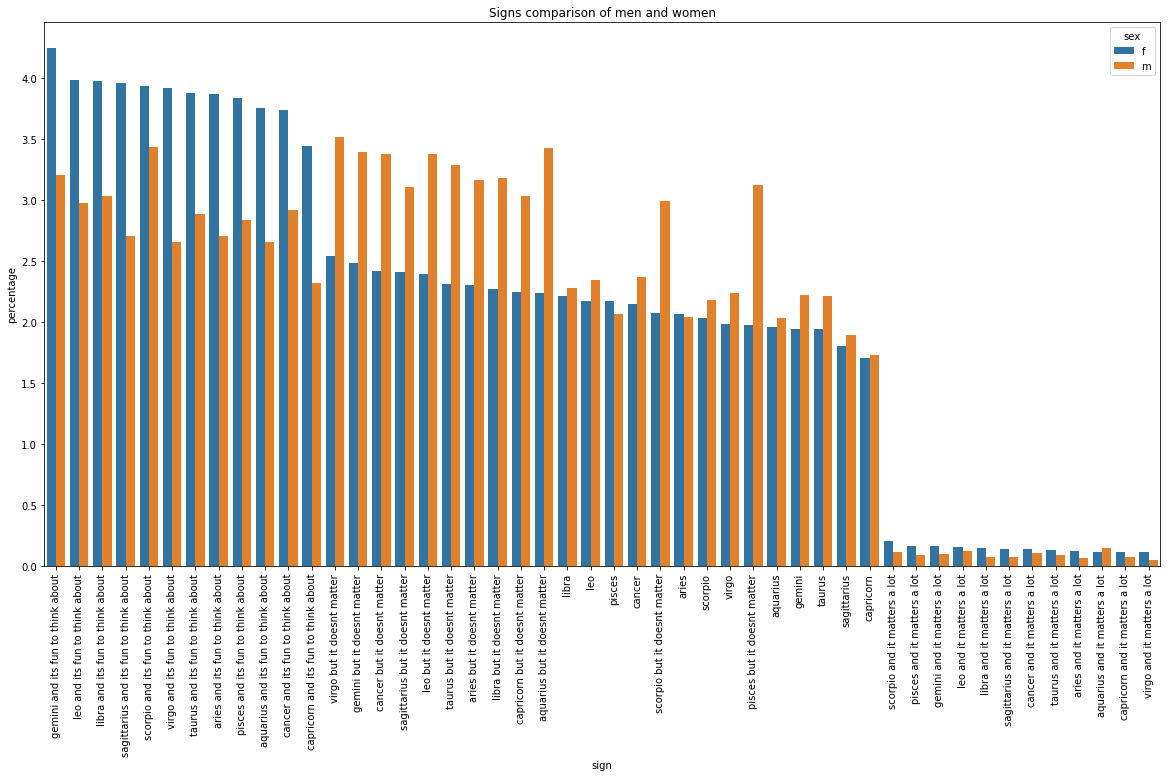

In [37]:
grouped_barplot('sign', 'Signs comparison of men and women', (20, 10), 90)

We can see domination of women in all categories with **and its fun to think about** opinion, and also domination of men with **it doesnt matter** opinion. Maybe this information can be useful. Let's divide this attribute by those characteristics:

In [38]:
def sign_transform(x):
    """Function that convert sign attributes into 4 groups."""
    if 'its fun' in x:
        return 'fun'
    elif 'doesnt matter' in x:
        return 'doesnt matter'
    elif 'matters a lot' in x:
        return 'matters a lot'
    else:
        return 'just sign'

In [39]:
X_train['sign'] = X_train['sign'].astype(str)
X_train['sign_status'] = X_train['sign'].apply(lambda x: sign_transform(x))

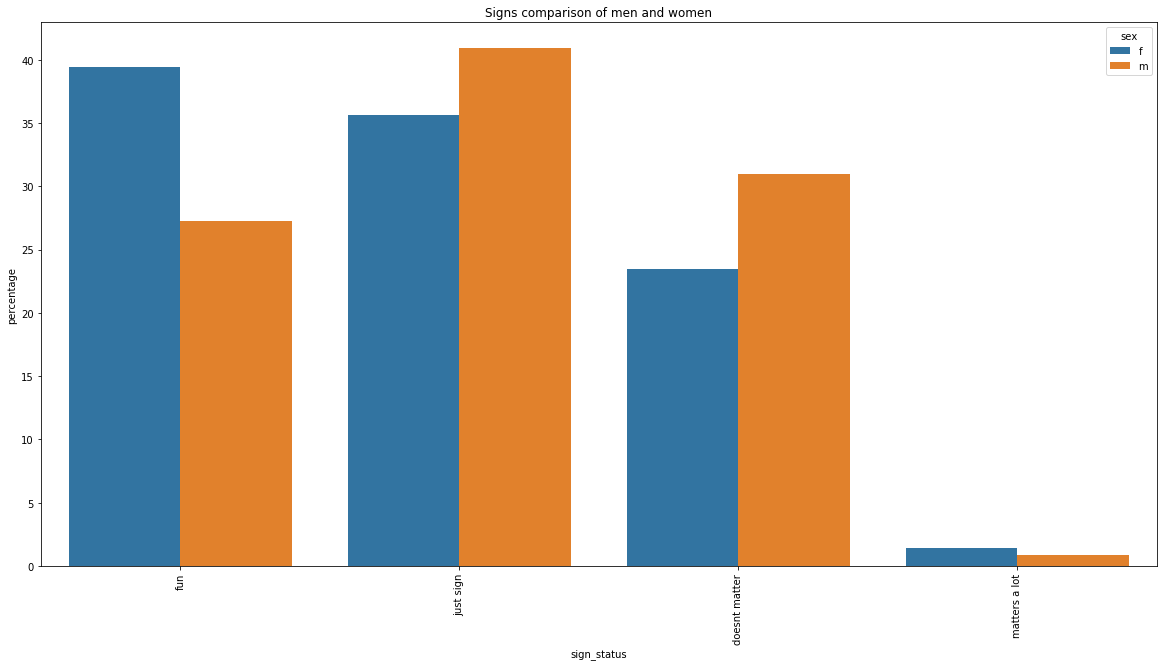

In [40]:
grouped_barplot('sign_status', 'Signs comparison of men and women', (20, 10), 90)

#### Speaks

Very interesting can be to look at the count of languages that person speaks. In my opinion, women speak more languages in general.

At first, we need to count languages for each person. Regular expression will help us:

In [41]:
X_train['languages_count'] = X_train.apply(lambda x: None if not isinstance(x['speaks'], str) else len(list(filter(None, re.findall('\(.*?\)|([^\W_]+[^\s-]*)', x['speaks'])))), axis=1)

Let's visualize the result: 

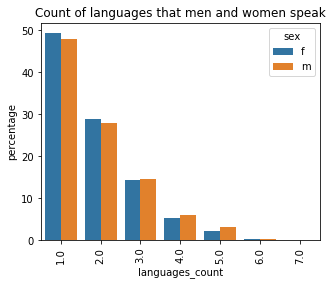

In [42]:
grouped_barplot('languages_count', 'Count of languages that men and women speak', rotation=90)

Unfortunately, there is no big difference between men and women.

#### Education

Education can show something interesting about men and women:

In [43]:
X_train.education.unique()

array(['working on college/university',
       'graduated from college/university',
       'graduated from masters program', 'working on med school',
       'graduated from law school', 'graduated from high school',
       'working on masters program', nan,
       'dropped out of college/university', 'working on high school',
       'dropped out of med school', 'working on ph.d program',
       'college/university', 'graduated from two-year college',
       'working on two-year college', 'graduated from space camp',
       'working on space camp', 'working on law school',
       'dropped out of two-year college',
       'dropped out of masters program', 'high school',
       'graduated from ph.d program', 'masters program',
       'dropped out of ph.d program', 'graduated from med school',
       'dropped out of space camp', 'two-year college',
       'dropped out of high school', 'dropped out of law school',
       'med school', 'space camp', 'ph.d program', 'law school'],
      dtype

Because there are a lot of categories, let's transform education data of each person to basic groups: **graduated**, **studying**, **dropped out** or **other**.

In [44]:
# auxiliary function
def education_status(x):
    """Set status value from education attribute string."""
    if not isinstance(x, str):
        return None
    if 'graduated' in x:
        return 'graduated'
    elif 'working on' in x:
        return 'studying'
    elif 'dropped out' in x:
        return 'dropped out'
    else:
        return 'other'

In [45]:
X_train['education_status'] = X_train['education'].apply(lambda x: education_status(x))

Now, let's visualize the results:

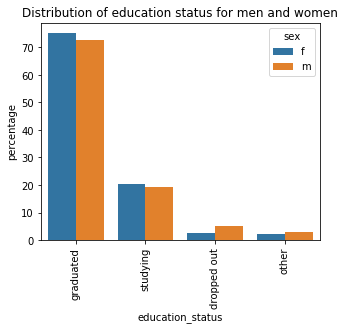

In [46]:
grouped_barplot('education_status', 'Distribution of education status for men and women', rotation=90)

Again, there is no significant difference between men and women.

#### Religion

Religion has the potential to show some differences between men and women. Maybe women are more serious about their religion, or maybe even men are better believers. At first, we need to know what values are for religion attribute in our data:

In [47]:
X_train.religion.unique()

array(['other and somewhat serious about it', 'other',
       'catholicism but not too serious about it',
       'buddhism and laughing about it',
       'catholicism and somewhat serious about it', nan,
       'agnosticism but not too serious about it', 'catholicism',
       'hinduism and laughing about it',
       'agnosticism and laughing about it',
       'christianity and somewhat serious about it',
       'other and laughing about it',
       'agnosticism and very serious about it',
       'atheism and very serious about it',
       'atheism and laughing about it', 'atheism',
       'christianity but not too serious about it', 'christianity',
       'buddhism and somewhat serious about it',
       'christianity and laughing about it', 'agnosticism',
       'agnosticism and somewhat serious about it',
       'judaism and laughing about it',
       'buddhism but not too serious about it',
       'other and very serious about it',
       'other but not too serious about it',
       

There we can see some interesting values. A lot of religions, but also there are flags if person is serious about religion or not. Let's check distribution for both genders:

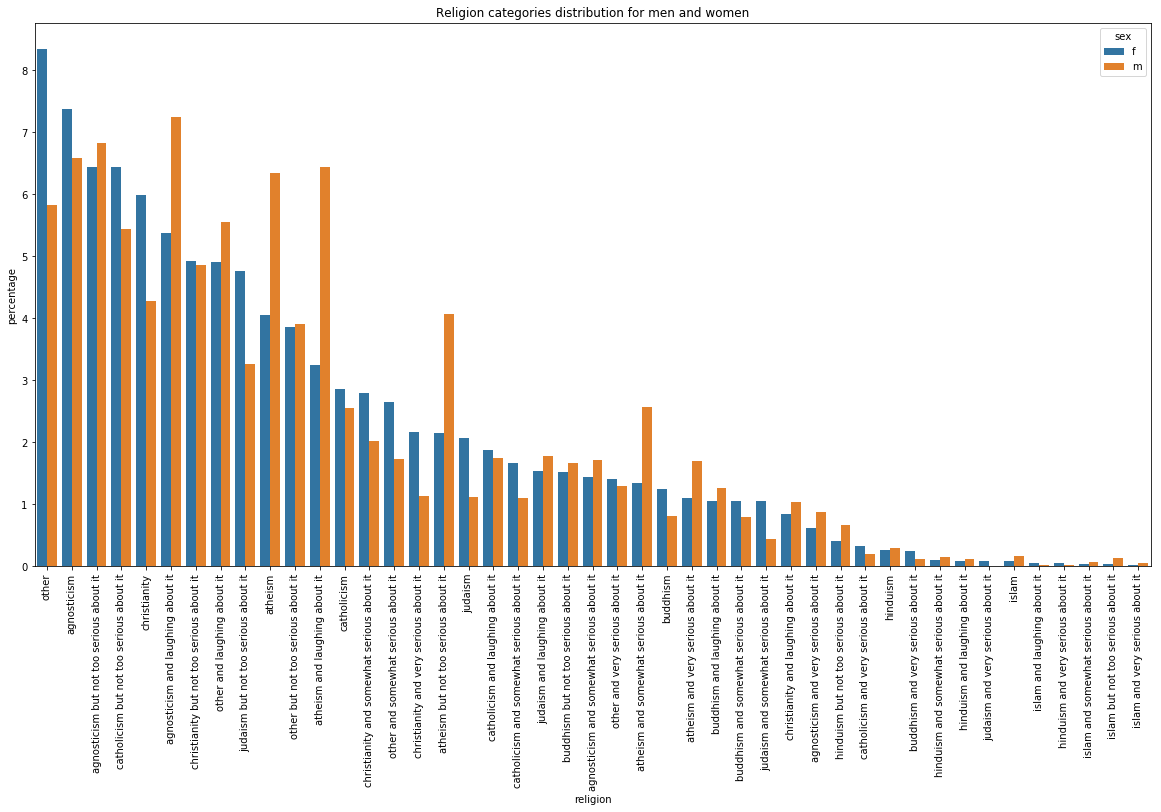

In [48]:
grouped_barplot('religion', 'Religion categories distribution for men and women', (20, 10), 90)

There are some higher values for men, and a lot of them correspond with *atheism*. Are men more atheists in general? Some values can be interesting for *feature engineering* later.

#### Pets

Are pets showing some differences?

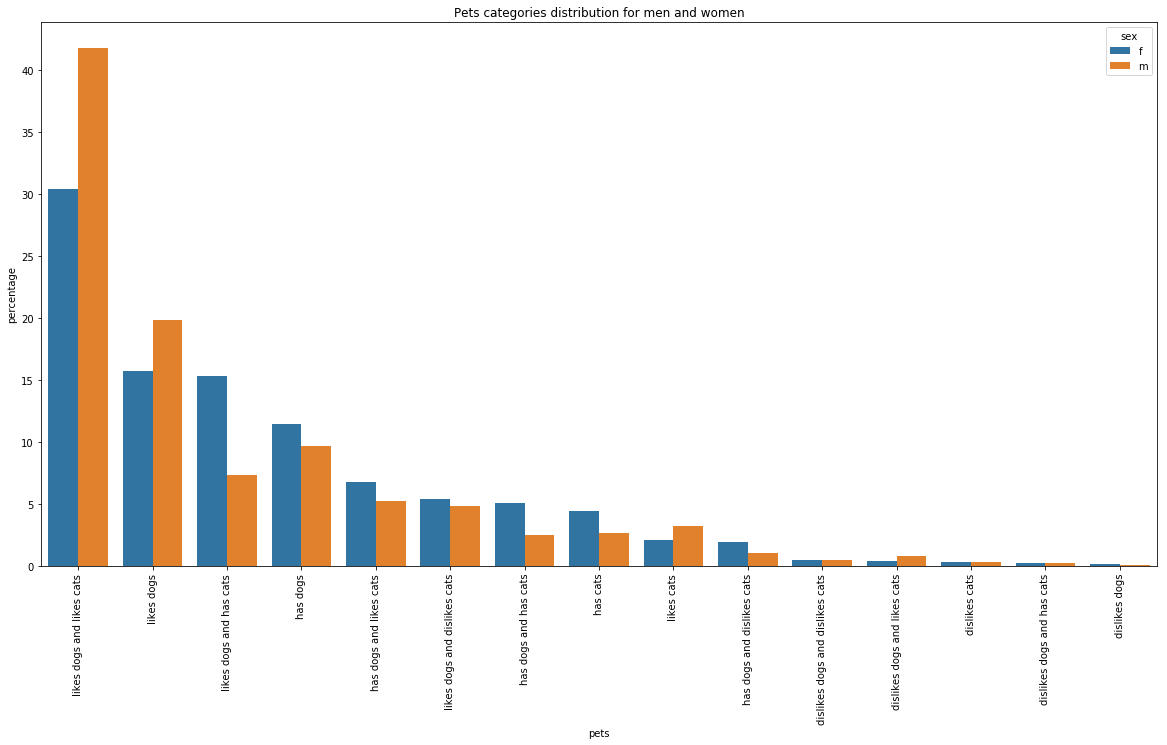

In [49]:
grouped_barplot('pets', 'Pets categories distribution for men and women', (20, 10), 90)

Having pets is more detailed question:

In [50]:
X_train['pets'] = X_train['pets'].astype(str)
X_train['pets_has_hasnt'] = X_train['pets'].apply(lambda x: 'has pet' if 'has' in x else 'has not pet')

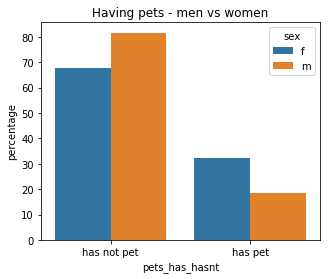

In [51]:
grouped_barplot('pets_has_hasnt', 'Having pets - men vs women')

There is small difference between men and women - women are more likely to have pet (about 35 percent) than men (about 20 percent).

#### Offspring

Offspring would be a nice indicator of women. Probably, women are more likely to have children than men, so let's check this up:

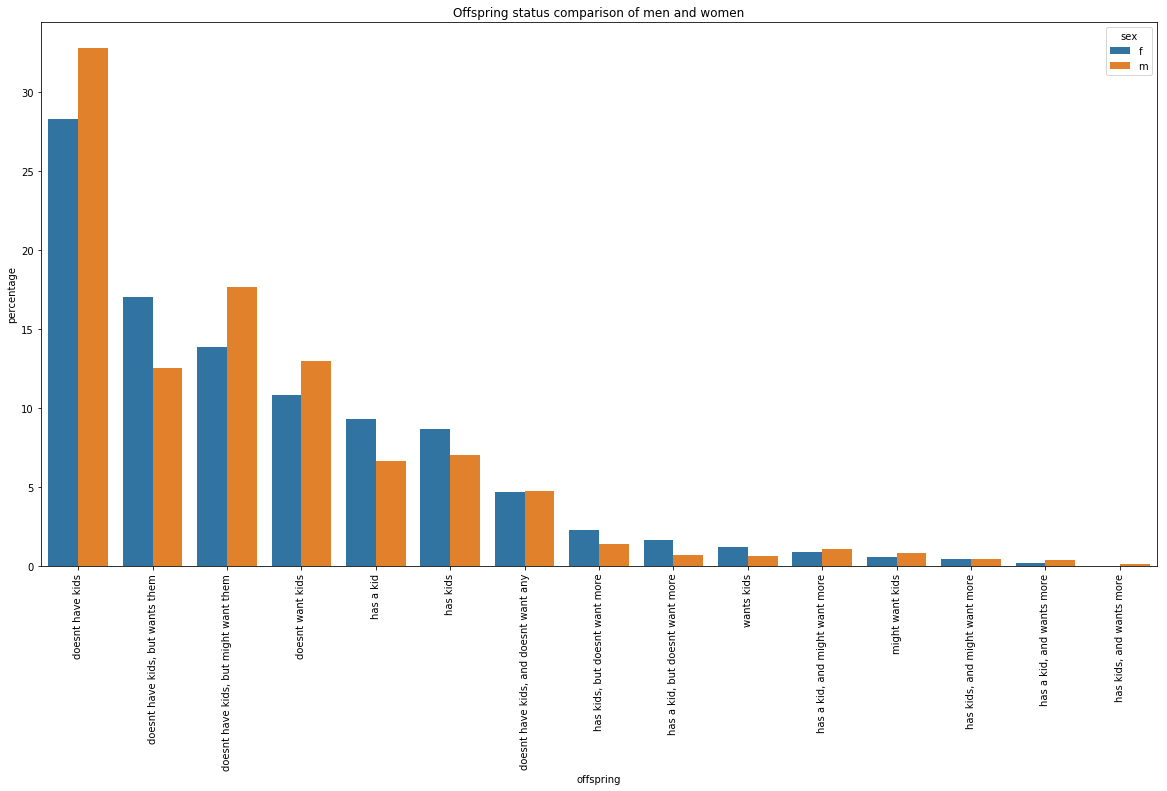

In [52]:
# just repairing data
X_train['offspring'] = X_train['offspring'].apply(lambda x: None if not isinstance(x, str) else x.replace('&rsquo;', ""))
grouped_barplot('offspring', 'Offspring status comparison of men and women', (20, 10), 90)

Unfortunately, there are no such a big differences, so offspring probably will not help us to classify men and women significantly.

###  Text attributes

There are also text attributes in dataset. Sometimes, interesting features are hidden also in text.

At first, some questions can help us to classify sex using text attributes:

In [53]:
# auxiliary functions and variables
essays = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
    
def word_occurences(x, word):
    """Counting word occurences in text attributes of record."""
    count = 0
    
    for e in essays:
        if isinstance(x[e], str):
            count += x[e].count(word)
        
    return count

def char_counter(x):
    """Counting characters in text attributes of record."""
    count = 0
    
    for e in essays:
        if isinstance(x[e], str):
            count += len(x[e])
        
    return count

**Are women writing longer messages/essays in general?**

In [54]:
X_train['char_count'] = X_train.apply(lambda x: char_counter(x), axis=1)

Let's check the means of characters count for men and women:

In [55]:
X_train[X_train.sex == 'm'].char_count.mean()

2191.094592244827

In [56]:
X_train[X_train.sex == 'f'].char_count.mean()

2205.651216082496

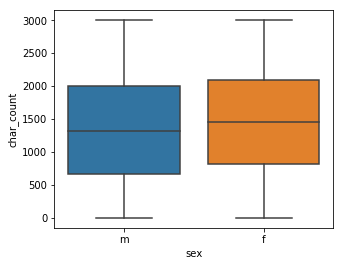

In [57]:
sns.boxplot('sex', 'char_count', data=X_train[X_train.char_count < 3000])

We can see, there is no or very low difference. So counting words is not going to help classify men and women.

**Is word 'love' more typical for women?**

In [58]:
X_train['love_occurrence'] = X_train.apply(lambda x: word_occurences(x, 'love'), axis=1)

At first, we need to realize if it is relevant to use this attribute. In how many percent of persons, is there word *love* used at least once?

In [59]:
len(X_train[X_train.love_occurrence > 0]) / len(X_train) * 100

69.65343231295354

Let's check mean of occurence of word 'love' for men:

In [60]:
X_train[X_train.sex == 'm'].love_occurrence.mean()

1.813319422709094

and also for women:

In [61]:
X_train[X_train.sex == 'f'].love_occurrence.mean()

2.884641424925785

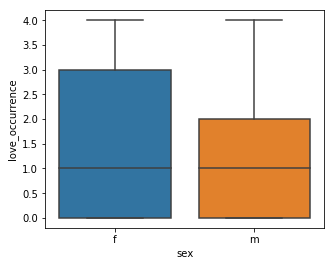

In [62]:
sns.boxplot('sex', 'love_occurrence', data=X_train[X_train.love_occurrence < 5])

We can see that word *love* is used more by women in general. But real question is, if the difference is significant for classification or not.

This method of word occurrences was also tried on word *sex*, *girlfriend*, *boyfriend* and *beer*. Unfortunately, those word are not used enough to see something interesting.

#### Text similarity

Maybe men and women would have different topics of writing or using different words. **Topic model** of *natural language processing* seems to be a good idea.

In [63]:
# import libraries
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import re

# LDA
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities

# TF*IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# PCA
from sklearn.decomposition import PCA

C:\Users\Peter\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [64]:
# this should be ran once
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Peter\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Our text attributes are not cleaned - there are also HTML tags etc. We need to clean them before next steps:

In [65]:
# auxiliary function for cleaning texts
def cleanhtml(raw_html):
    """Function to clean all html tags etc and return clean text."""
    text = re.sub('<.*?>', '', raw_html)
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

def text_prep(df, column):
    """Function that prepares text for text processing."""
    
    # clean text from special characters
    df[column] = df[column].astype(str)
    df[column + '_clean'] = df[column].apply(lambda x: cleanhtml(x))

    # remove stopwords
    stop_words = stopwords.words('english')
    df[column + '_no_stopwords'] = df[column + '_clean'].apply(lambda x: [word for word in x if word not in stop_words])
    
    # at first, get a list of all words
    all_words = [word for item in list(df[column + '_no_stopwords']) for word in item]

    # use nltk FreqDist to get a frequency distribution of all words
    fdist = FreqDist(all_words)
    
    # choose k most common words
    top_words = fdist.most_common(5000)
    top_words = [item[0] for item in top_words]
    
    # remove words that are not in top_words - this may take a few minutes
    df[column + '_ready'] = df[column + '_no_stopwords'].apply(lambda x: [word for word in x if word in top_words])

We use *text_prep* function. At first, it cleans data from special characters. After, it removes stopwords - words that have no meaning or do not provide any information, so we should remove them. Then, create from words frequency dictionary and choose first k most common words, because words that are in the bottom and are just 1-2 times over all people in dataset are not interesting. After, we need to remove all words from our texts that are not *top words*.

In [66]:
text_prep(X_train, 'essay0')

Now we need to create model. For our hypothesis we need to create *topic model*. One that is often used is **LDA**. At first, we need to create dictionary from all words used in essay0 attribute within all records:

In [67]:
dictionary = corpora.Dictionary(X_train['essay0_ready'])

In [68]:
corpus = [dictionary.doc2bow(doc) for doc in X_train['essay0_ready']]

In [69]:
lda = LdaModel(corpus=corpus, id2word=corpora.Dictionary(X_train['essay0_ready']))

C:\Users\Peter\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


By default, LDA is trained for 100 topics:

In [70]:
len(lda.get_topics())

100

Let's check some topics in our LDA model:

In [71]:
lda.show_topic(topicid=50, topn=5)

[('sports', 0.08433692),
 ('student', 0.06777945),
 ('playing', 0.046301723),
 ('im', 0.038068883),
 ('football', 0.031336598)]

In [72]:
lda.show_topic(topicid=11, topn=5)

[('love', 0.022229886),
 ('man', 0.01900592),
 ('sensitive', 0.016339455),
 ('strong', 0.016293444),
 ('touch', 0.015776502)]

Now, we will create features from our LDA model. Every topic will be one new column in our dataframe, so we can fill for every row, how close is essay0 of this record to every topic. Let's choose document topics distances:

In [73]:
lda_matrix = [[] for x in range(len(X_train))]

for index, document in enumerate(lda[corpus]):
    for feature in range(100):
        flag = False
        for distance in document:
            if feature == distance[0]:
                lda_matrix[index].append(distance[1])
                flag = True
                break
        if not flag:
            lda_matrix[index].append(0)

In [74]:
lda_df = pd.DataFrame(lda_matrix)

In [75]:
lda_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.013836,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.018484,0.0,0.024188,0.014219,0.000000,0.000000,0.015433,0.0,0.000000,0.0
1,0.000000,0.0,0.017148,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.010334,0.107691,0.055727,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.163423,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.183444,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Of course, that is a lot of columns here. We need to reduce them, so PCA would help:

In [76]:
pca = PCA(n_components=1)
pc = pca.fit_transform(lda_df)
df_lda = pd.DataFrame(data = pc, columns = ['lda_pca'])

In [77]:
df_lda.head()

,lda_pca
0,-0.035786
1,-0.037054
2,-0.042296
3,-0.048354
4,0.470705


Now, we have dataframe with LDA values reduced by PCA. We need to merge this dataframe with our X_train:

In [78]:
X_train = pd.concat([X_train.reset_index(drop=True), df_lda], axis=1, sort=False)

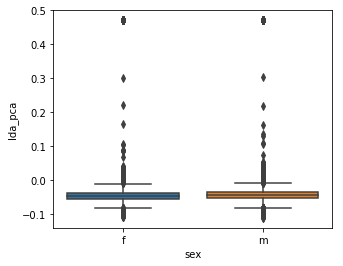

In [79]:
sns.boxplot('sex', 'lda_pca', data=X_train)

Unfortunatelly, from graphs above we can see there are no significant differences between men and women in topics they are writing about.

#### TF-IDF

Term frequency can show something. For that, **TF-IDF** algorithm is perfect.

We will look at one hundred most common words and their frequency in texts:

In [80]:
# create vectorizer
vectorizer = TfidfVectorizer()

Now, we need to get features matrix from vectorizer and add them to our dataframe. For that, let's create a function:

In [81]:
def tf_idf_model(df, column):
    """Function to create tf-idf model."""
    # data preparation
    df[column + '_tfidf_ready'] = df[column + '_ready'].apply(lambda x: ' '.join(x))
    
    # TF-IDF
    tf_idf_matrix = vectorizer.fit_transform(df[column + '_tfidf_ready'])
    df_tf_idf = pd.DataFrame(tf_idf_matrix.toarray(), columns=vectorizer.get_feature_names())
    
    # PCA
    pca = PCA(n_components=1)
    pc = pca.fit_transform(df_tf_idf)
    df_tf_idf = pd.DataFrame(data = pc, columns = ['tf_idf_pca'])
    
    df = pd.concat([df.reset_index(drop=True), df_tf_idf], axis=1, sort=False)
    
    return df

Now, let's train our tf-idf model:

In [82]:
df_tf_idf = tf_idf_model(X_train, 'essay0')

Now, let's check the differences between men and women using TF-IDF on *essay0* attribute. Attribute *essay0* is just a subset of all essays, so if there is any significant difference, probably it will be shown by *essay0*.

Our TF-IDF values are in just 1 column now:

In [83]:
df_tf_idf['tf_idf_pca'].head()

0   -0.095445
1   -0.099276
2   -0.092057
3   -0.085598
4    0.923113
Name: tf_idf_pca, dtype: float64

We need to check differences between men and women, to know if we can use it for classification:

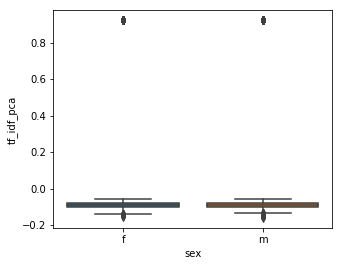

In [84]:
sns.boxplot('sex', 'tf_idf_pca', data=df_tf_idf)

From graph above, we can see that TF-IDF will probably not help us to classify sex better.

**Note: TF-IDF and LDA were also tried for classification, but no improvement came using them (or just a little).**

## Preprocessing

Some columns needs to be transformed before using them.

In [85]:
# import libraries to make preprocessing more efficient
from scipy.stats import boxcox

For more efficient preprocessing, some auxiliary functions would be nice:

In [86]:
# Auxiliary functions
def normalize(dataframe, column, attr):
    """Function that normalizes numerical data (transform them to normal distribution)."""
    dataframe[column] = boxcox(dataframe[column]+2, lmbda=attr)

def remove_outliers(dataframe, column, up, bottom):
    """Function that removes outliers in numerical data."""
    dataframe.loc[dataframe[column] > up, column] = up
    dataframe.loc[dataframe[column] < bottom, column] = bottom

def replace_nan_most_frequent(dataframe, column, value):
    """Function that replaces NaN values in categorical data with most frequent value."""
    dataframe[column] = dataframe[column].fillna(value)

def replace_nan_value(dataframe, column, value):
    """Function that replaces NaN values with one specific value."""
    dataframe[column] = dataframe[column].fillna(value)

def replace_nan_mean(dataframe, column, value):
    """Function that replaces NaN values in categorical data with most frequent value."""
    dataframe[column] = dataframe[column].fillna(value)

def categorical_encoding(dataframe, column):
    """Function that makes encoding of categorical attribute (OneHotEncoder)."""
    return pd.concat([dataframe, pd.get_dummies(dataframe[column])], axis=1)

All transformations are stored in one object to be able to reproduce them also on test dataset:

In [87]:
class Preprocessor:
    
    def preprocessing_fit(self, dataframe):
        """Function that fit dataframe for preprocessing."""
        
        # quantiles
        self.quantiles = {}
        self.quantiles['height_05'] = dataframe['height'].quantile(.05) * 2.54
        self.quantiles['height_95'] = dataframe['height'].quantile(.95) * 2.54
        
        # means
        self.means = {}
        self.means['height'] = dataframe.height.mean() * 2.54
        
        # most frequent values
        self.most_frequent = {}
        self.most_frequent['body_type'] = dataframe['body_type'].value_counts().index[0]
        self.most_frequent['diet'] = dataframe['diet'].value_counts().index[0]
        self.most_frequent['job'] = dataframe['job'].value_counts().index[0]

        
    def preprocessing_transform(self, dataframe, columns):
        """Function that transforms dataframe. Some other auxiliary functions are called inside."""
        
        dataframe = dataframe.reset_index(drop=True)
        
        # transform height from inches to cm
        dataframe['height'] = dataframe.height.apply(lambda x: x * 2.54)

        # labels repairing
        dataframe['sign'] = dataframe['sign'].apply(lambda x: None if not isinstance(x, str) else x.replace('&rsquo;', ""))

        # remove outliers in numerical attributes
        remove_outliers(dataframe, 'height', self.quantiles['height_95'], self.quantiles['height_05'])

        # replace NaN values in numerical attributes with mean
        replace_nan_mean(dataframe, 'height', self.means['height'])

        # replace NaN values in categorical attributes with most frequent value
        replace_nan_most_frequent(dataframe, 'body_type', self.most_frequent['body_type'])
        replace_nan_most_frequent(dataframe, 'diet', self.most_frequent['diet'])
        replace_nan_most_frequent(dataframe, 'job', self.most_frequent['job'])

        ## Feature engineering
        dataframe['love_occurrence'] = dataframe.apply(lambda x: word_occurences(x, 'love'), axis=1)
        dataframe['sign'] = dataframe['sign'].astype(str)
        dataframe['sign_status'] = dataframe['sign'].apply(lambda x: sign_transform(x))
        
        ## Select just those columns, that will be used in classification
        dataframe = dataframe[columns]
        
        ## OneHotEncoding
        # one hot encoding of categorical attributes
        dataframe = categorical_encoding(dataframe, 'job')
        dataframe = categorical_encoding(dataframe, 'body_type')
        dataframe = categorical_encoding(dataframe, 'diet')
        dataframe = categorical_encoding(dataframe, 'sign_status')
        
        # drop columns after one-hot encoding
        dataframe = dataframe.drop(['job', 'body_type', 'diet', 'sign_status'], axis=1)
        
        return dataframe

Now, we need to fit our preprocessing to train data and than, transform train and test dataframes. We also have to choose correct columns for training our classifiers.

Following attributes are going to be chosen:
* height
* love_occurences
* job (one-hot encoded)
* body_type (one-hot encoded)
* diet (one-hot encoded)
* sign_status (one-hot encoded)

In [88]:
# create preprocessor object
preprocessor = Preprocessor()

# fit preprocessor for train data
preprocessor.preprocessing_fit(X_train)

# columns for classification, but also new columns may be added in feature engineering
columns = ['height', 'job', 'body_type', 'diet', 'love_occurrence', 'sign_status']

# transform train and also test data
X_train = preprocessor.preprocessing_transform(X_train, columns)
X_test = preprocessor.preprocessing_transform(X_test, columns)

## Classification


Our task is to classify wether it is a man or women, using features from analysis above. Let's try some methods and choose the best one.

In [89]:
# feature scaling
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# metrics for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Data preparation

Some algorithms are better when all values are close to 0, so we need to scale them:

In [90]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

Logistic regression is the first option. Let's try and check accuracy:

In [91]:
lr = LogisticRegression(random_state = 0)

Now, we need to fit our classifier with train data:

In [92]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Last step is to predict our test data:

In [93]:
y_pred = lr.predict(X_test)

And results? Let's check confusion matrix and accuracy:

In [94]:
confusion_matrix(y_test, y_pred)

array([[4028,  888],
       [ 640, 6434]], dtype=int64)

In [95]:
accuracy_score(y_test, y_pred) * 100

87.25604670558799

In all next algorithms, the same steps will be applied.

### Support Vector Machine (SVM)

Second algorithm that we can try is Support Vector Machine. It would be nice to try *linear* and also *kernel* SVM, to see the accuracy for each and the difference.

#### Linear SVM

In [96]:
svcl = SVC(kernel='linear', random_state=0)  

In [97]:
svcl.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
y_pred = svcl.predict(X_test)  

In [99]:
confusion_matrix(y_test, y_pred)

array([[4019,  897],
       [ 636, 6438]], dtype=int64)

In [100]:
accuracy_score(y_test, y_pred) * 100

87.21434528773977

#### Kernel SVM

In [101]:
svck = SVC()  

In [102]:
svck.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
y_pred = svck.predict(X_test)  

In [104]:
confusion_matrix(y_test, y_pred)

array([[3947,  969],
       [ 619, 6455]], dtype=int64)

In [105]:
accuracy_score(y_test, y_pred) * 100

86.75562969140951

### Decision Tree

In [106]:
dt = DecisionTreeClassifier(max_depth=7, random_state=0)

In [107]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [108]:
y_pred = dt.predict(X_test)

In [109]:
confusion_matrix(y_test, y_pred)

array([[3939,  977],
       [ 702, 6372]], dtype=int64)

In [110]:
accuracy_score(y_test, y_pred) * 100

85.99666388657215

### Random Forest

In [111]:
rf = RandomForestClassifier(max_depth=10, random_state=1, n_estimators=80)

In [112]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [113]:
y_pred = rf.predict(X_test)

In [114]:
confusion_matrix(y_test, y_pred)

array([[3948,  968],
       [ 607, 6467]], dtype=int64)

In [115]:
accuracy_score(y_test, y_pred) * 100

86.86405337781484

### XGBoost

The special one is XGBoost. It is said that XGBoost has good accuracy, so even without so many experiences with XGBoost, it would be tried:

In [116]:
xgbc = xgb.XGBClassifier(max_depth = 5, random_state=0)

In [117]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [118]:
y_pred = xgbc.predict(X_test)

C:\Users\Peter\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [119]:
confusion_matrix(y_test, y_pred)

array([[4012,  904],
       [ 626, 6448]], dtype=int64)

In [120]:
accuracy_score(y_test, y_pred) * 100

87.2393661384487

### Optimalization

Our best achieved accuracy was about 87 percent. There are several approaches of algorithms optimalization as hyperparameter tuning, combination of algorithms etc. Let's try to optimize our accuracy results.

#### Feature selection

Sometimes, feature selecion is the correct way to create efficient model. Some features are not as important as we though. There are two main types of feature selection - *filter* or *wrapper*. Filter is not going to be used, because features have been chosen precisely, not randomly. Wrapper would show, which features helped the most for specific model.

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE

## !!!!!!!!!!!!!!!!!!
Feature selection will be done just for 4 best models (LogisticRegression, LinearSVC, RandomForest and XGBoost). For each model, two types of feature selectors will be tried - **sequential feature selector** and **recursive feature elimination**. Let's start with LinearRegression:

In [122]:
# sfs = SFS(lr, k_features=10, forward=True,  floating=False, scoring='accuracy', cv=0)

In [123]:
# sfs1 = sfs1.fit(X_train, y_train)

In [124]:
# sfs.subsets_

In [125]:
# rfe = RFE(lr, 10, step=1)
# rfe = rfe.fit(X_train, y_train)

In [126]:
# rfe.support_

In [127]:
# rfe.ranking_

#### Hyperparameter tuning

Previously, we found 4 classifiers with relatively good accuracy. Now, we can try to tune their parameters to achieve best score:

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

At first, **LogisticRegression** parameters will be tuned:

In [129]:
# create logistic regression classifier, which will be tuned
lr = LogisticRegression(random_state=0)

In [130]:
# hyperparameters that will be tuned
hyperparameters = dict(C=np.logspace(0, 4, 10), penalty=['l1', 'l2'])

In [131]:
# grid search using 5-fold cross validation
clf = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)

Now, we can get best LogisticRegression classifier with tuned parameters by fitting our data:

In [132]:
best_model = clf.fit(X_train, y_train)

We have best model for LogisticRegression, so we just need to check accuracy after tuning:

In [133]:
y_pred = best_model.predict(X_test)

In [134]:
accuracy_score(y_test, y_pred)

0.8725604670558799

Accuracy is the same as without hyperparameter tuning. That means, default parameters are the best that can be chosen for this data. Other models (RandomForest, XGBoost...) were tuned manually by trying parameters, so no GridSearch is needed (it has been tried, but no significant score additions were found, as well as in LogisticRegression).

#### Ensemble learning 

##### Voting Classifier
Sometimes, models did not learn the same principles, so combination of models would help to classify better. Let's try that.

In [135]:
from sklearn.ensemble import VotingClassifier

As LogisticRegression, RandomForest, LinearSVM and XGBoost did the best job, we will combine them into one voting classifier:

In [136]:
# classifiers
classifiers = [('LR', lr), ('RF', rf), ('XGB', xgbc), ('SVC', svcl)]
voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')

In [137]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('RF', RandomFore...ar',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [138]:
y_pred = voting_classifier.predict(X_test)

C:\Users\Peter\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Peter\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [139]:
confusion_matrix(y_test, y_pred)

array([[4062,  854],
       [ 671, 6403]], dtype=int64)

In [140]:
accuracy_score(y_test, y_pred) * 100

87.2810675562969

#### Boosting

##### Gradient Tree Boosting
Boosting is another type of prediction optimalization. Gradient Tree Boosting classification can elevate our score:

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

We need to create gradient boosting classifier:

In [142]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [143]:
confusion_matrix(y_test, y_pred)

array([[3987,  929],
       [ 623, 6451]], dtype=int64)

In [144]:
accuracy_score(y_test, y_pred) * 100

87.0558798999166

Gradient Tree Boosting turned out to be a good classifier, 87 percent accuracy is really nice score. Unfortunatelly, this score has been already achieved by LogisticRegression, LinearSVC or XGBoost.

## Results

In this project, the task was to classify men and women using machine learning algorithms. 

At first, analysis of given dataset was done. From plots and relationships between attributes, we found some significant differences between men and women. We did also feature engineering to get some more features that would help classifying. We created some new simple features by grouping values (education status, sign status, ...) or also text features (TF-IDF, word occurrences, ...). 

After finding some features and relationships, preprocessing was executed. We needed to remove outliers, replace NaN values, do OneHot encodings, etc.

When data were ready, some classification models were tried. Average accuracy was about 86-87 percent. For better accuracy, some optimalizations were done (ensemble learning, hyperparameter tuning, ...).

As the result, the best achieved accuracies for single algorithm were 87.21% (LinearSVM), 87.24% (XGBoost) and 87.26% (LogisticRegression). For all those algorithms, hyperparameter tuning was done manually or using GridSearchCV, but no significant additions were found. Finally, the best achieved accuracy was approximately **87.40%** using VotingClassifier, that combined our best classifiers (LogisticRegression, XGBoostClassifier, RandomForest and LinearSVM).